## 강원도, 142353
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
readD = pd.read_csv('region-data-files/gw_region.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142353 entries, 0 to 142352
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 114.0+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
        
    'gsn_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop', 'sj_pop', 'us_pop',
    'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi',
    'dg_re_ccsi', 'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'ccb_re_ccsi',
    'ccn_re_ccsi', 'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan',
    'jrb_loan', 'jj_loan', 'ccn_loan', 'ccb_loan','all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142353 entries, 0 to 142352
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               142353 non-null  object 
 1   apt_floor                142353 non-null  int64  
 2   period_completed         142353 non-null  int64  
 3   pyung                    142353 non-null  float64
 4   price_per_pyung_present  142353 non-null  float64
 5   kospi200                 142353 non-null  float64
 6   kospi200construct        142353 non-null  float64
 7   kosdaq                   142353 non-null  float64
 8   dowjones                 142353 non-null  float64
 9   shanghai                 142353 non-null  float64
 10  exchange_rate            142353 non-null  float64
 11  gold                     142353 non-null  float64
 12  oil                      142353 non-null  float64
 13  export                   142353 non-null  int64  
 14  impo

In [6]:
preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

원주시    43243
춘천시    29366
강릉시    19822
속초시    11598
동해시     7954
태백시     6427
삼척시     4161
평창군     3556
홍천군     3452
양양군     2774
정선군     2462
횡성군     1751
영월군     1439
철원군     1306
고성군     1130
양구군     1013
인제군      592
화천군      307
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'so_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142353 entries, 0 to 142352
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               142353 non-null  object 
 1   apt_floor                142353 non-null  int64  
 2   period_completed         142353 non-null  int64  
 3   pyung                    142353 non-null  float64
 4   price_per_pyung_present  142353 non-null  float64
 5   kospi200                 142353 non-null  float64
 6   kospi200construct        142353 non-null  float64
 7   kosdaq                   142353 non-null  float64
 8   dowjones                 142353 non-null  float64
 9   shanghai                 142353 non-null  float64
 10  exchange_rate            142353 non-null  float64
 11  gold                     142353 non-null  float64
 12  oil                      142353 non-null  float64
 13  export                   142353 non-null  int64  
 14  impo

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
pyung                      0.329307
apt_floor                  0.313382
ccb_pop                    0.223039
gg_pop                     0.213814
gw_loan                    0.204823
dowjones                   0.190783
cpi_living                 0.180272
kosdaq                     0.167118
exchange_rate              0.153134
shanghai                   0.129916
gw_pop                     0.110932
kospi200                   0.101405
gold                      -0.003101
export                    -0.061252
gw_re_ccsi                -0.081683
import                    -0.095863
gsb_pop                   -0.134285
loan_interest_rate        -0.192241
oil                       -0.196066
kospi200construct         -0.218992
period_completed          -0.578137
Name: price_per_pyung_present, dtype: float64

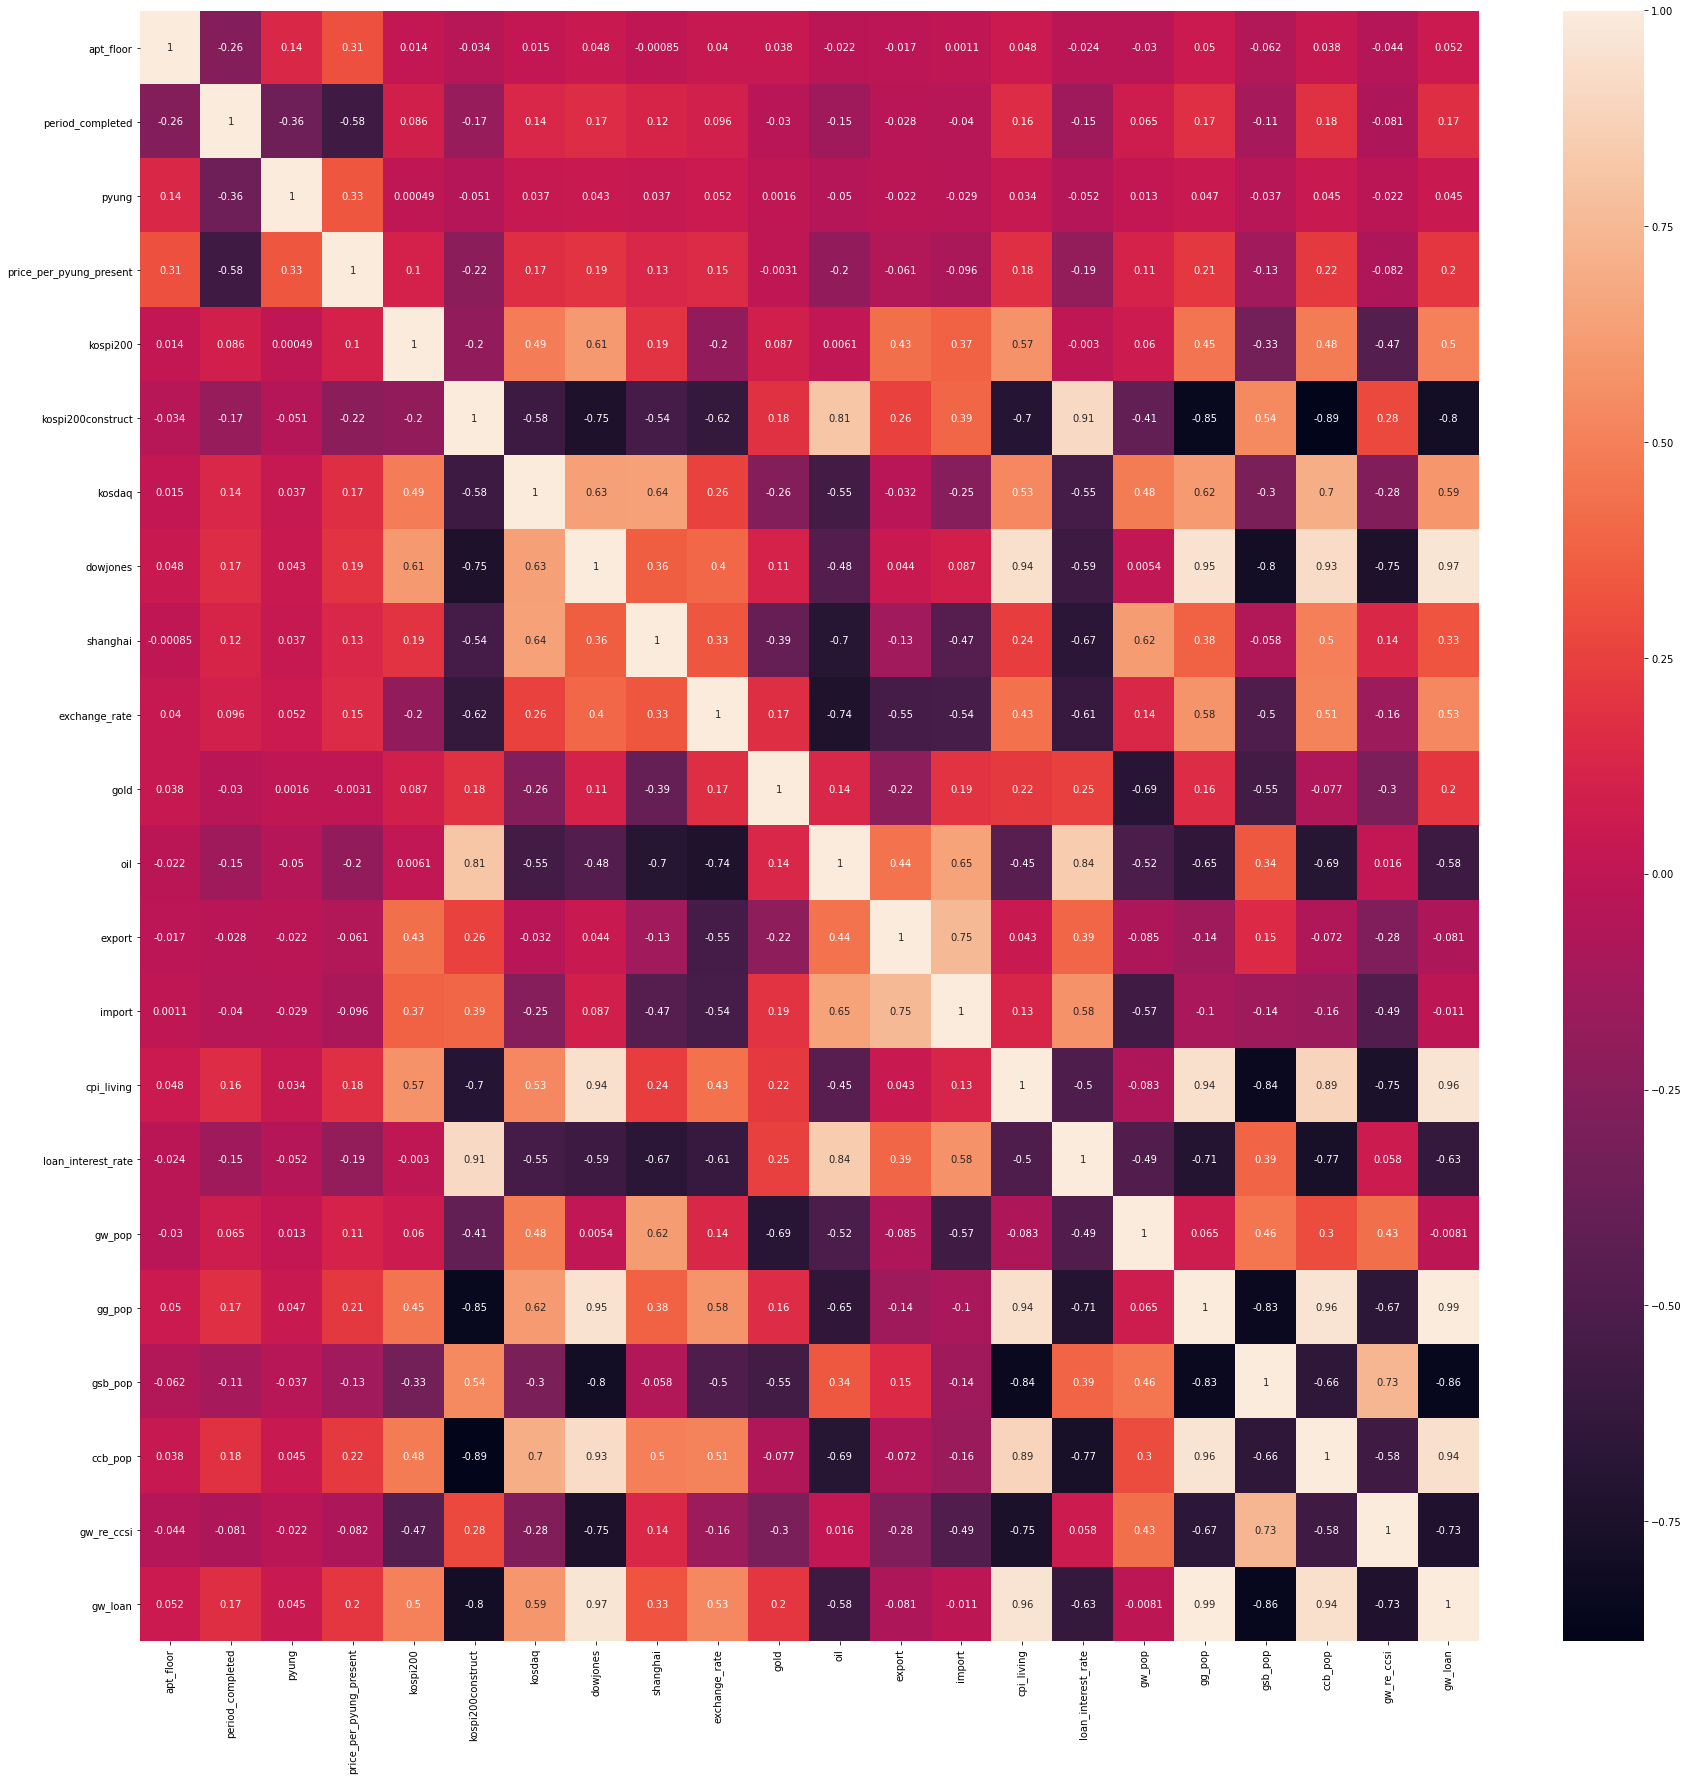

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.423530e+05
mean     6.175179e+06
std      2.235619e+06
min      1.816720e+05
25%      4.554970e+06
50%      5.924437e+06
75%      7.579212e+06
max      2.187591e+07
Name: price_per_pyung_present, dtype: float64


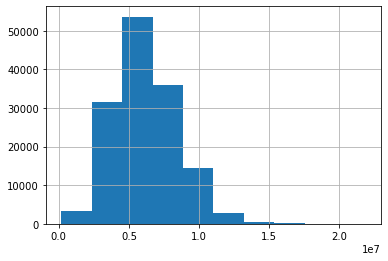

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 1.816720e+05
print(preD['price_cat'].describe())

count    142353.000000
mean         33.990814
std          12.305800
min           1.000000
25%          25.072493
50%          32.610622
75%          41.719208
max         120.414329
Name: price_cat, dtype: float64


In [12]:
# count    142353.000000
# mean         33.990814
# std          12.305800
# min           1.000000
# 25%          25.072493
# 50%          32.610622
# 75%          41.719208
# max         120.414329

def calc_price_categorize(D):

    if D['price_cat'] < 25.072493 :
        D['price_cat'] = 1.0
    elif D['price_cat'] < 32.610622:
        D['price_cat'] = 2.0
    elif D['price_cat'] < 41.719208:
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

4.0    35589
1.0    35588
3.0    35588
2.0    35588
Name: price_cat, dtype: int64

In [13]:
preD.to_csv('region-ml-data-files/gw_region.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
readD = pd.read_csv('region-ml-data-files/gw_region.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142353 entries, 0 to 142352
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               142353 non-null  object 
 1   apt_floor                142353 non-null  int64  
 2   period_completed         142353 non-null  int64  
 3   pyung                    142353 non-null  float64
 4   price_per_pyung_present  142353 non-null  float64
 5   kospi200                 142353 non-null  float64
 6   kospi200construct        142353 non-null  float64
 7   kosdaq                   142353 non-null  float64
 8   dowjones                 142353 non-null  float64
 9   shanghai                 142353 non-null  float64
 10  exchange_rate            142353 non-null  float64
 11  gold                     142353 non-null  float64
 12  oil                      142353 non-null  float64
 13  export                   142353 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.250003
2.0    0.250003
1.0    0.250003
3.0    0.249992
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

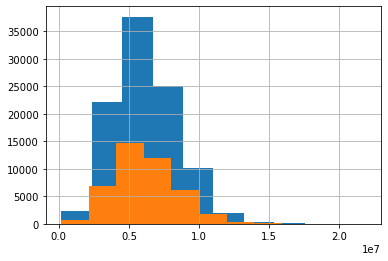

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([ 0.56033837,  0.97902004, -0.32795025,  2.88899101, -0.33475689,
        2.95549527,  1.50844749,  1.11521727, -1.07256981,  0.04951218,
        0.03392338,  0.99251961,  1.39632446,  0.7903361 ,  0.25542264,
        0.6210155 ,  0.71225155, -0.25243503,  0.82576103, -0.31308825,
        0.83033961,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [800],
              'gbr__max_depth': [7]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

# ratio 컬럼 제거
# 최상의 교차 검증 정확도:  0.8840482518217406
# 테스트 세트 점수:  0.8860974669036041
# 최적의 매개변수: {'gbr__max_depth': 6, 'gbr__n_estimators': 500}

# retio 컬럼 포함
# 최상의 교차 검증 정확도:  0.8828557392347506
# 테스트 세트 점수:  0.88503370332087
# 최적의 매개변수: {'gbr__max_depth': 6, 'gbr__n_estimators': 500}

최상의 교차 검증 정확도:  0.9038211376103488
테스트 세트 점수:  0.9098043638699784
최적의 매개변수: {'gbr__max_depth': 7, 'gbr__n_estimators': 800}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

# ratio 컬럼 제거
# grid rmse:  751694.1810317887
# grid mae:  542469.1774407054

# ratio 컬럼 포함
# grid rmse:  755196.1513913969
# grid mae:  543372.0681157429

grid rmse:  668909.3399190436
grid mae:  466751.879745829


In [13]:
grid.cv_results_

{'mean_fit_time': array([285.95136635]),
 'std_fit_time': array([3.97950307]),
 'mean_score_time': array([0.75598717]),
 'std_score_time': array([0.00731796]),
 'param_gbr__max_depth': masked_array(data=[7],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[800],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 7, 'gbr__n_estimators': 800}],
 'split0_test_score': array([0.90146582]),
 'split1_test_score': array([0.90331177]),
 'split2_test_score': array([0.90668582]),
 'mean_test_score': array([0.90382114]),
 'std_test_score': array([0.00216128]),
 'rank_test_score': array([1])}

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, 'models/gw_region.pkl')


['models/gw_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load('models/gw_region.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  668909.3399190436
